In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [2]:
#read in order summary file
desgined = pd.read_csv('../Data/Supp_TableS4_Construct_Summary.csv')
desgined = desgined[desgined.Name.str.contains('-')].copy()

desgined

,Name,All mutations,Total # mutations,Designed mutations,Designed mutations (relative to base VoC),# designed mutations,Insert sequence (Protein),Insert sequence (DNA),Plasmid Sequence,Infectious,Addgene ID
4,WuG-4a,"K147N,S494R,F490R,D614G,R683N",5,"K147N,S494R,F490R,R683N","K147N,S494R,F490R,R683N",4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,217462
5,WuG-4b,"K147N,S494R,K529L,D614G,R683L",5,"K147N,S494R,K529L,R683L","K147N,S494R,K529L,R683L",4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,217463
6,WuG-4c,"N439R,T478K,E484V,D614G,K529L",5,"N439R,T478K,E484V,K529L","N439R,T478K,E484V,K529L",4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,217464
7,WuG-8a,"K113T,R158A,K147N,N439R,T478K,S494R,F490R,D614...",9,"K113T,R158A,K147N,N439R,T478K,S494R,F490R,R683V","K113T,R158A,K147N,N439R,T478K,S494R,F490R,R683V",8,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,217465
8,WuG-8b,"K147N,S155R,R403T,N439R,T478K,E484V,K529L,D614...",9,"K147N,S155R,R403T,N439R,T478K,E484V,K529L,R683N","K147N,S155R,R403T,N439R,T478K,E484V,K529L,R683N",8,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,No,217466
...,...,...,...,...,...,...,...,...,...,...,...
82,BA.5-1a,"Q493R,T19I,L24del,P25del,P26del,A27S,H69del,V7...",35,Q493R,Q488R,1,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,ATGTTCGTGTTTCTGGTTCTGCTTCCCCTGGTCTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTGCTTCCCCTGGTCTCTAGTCAGTGCG...,Yes,210117
83,B.1-2d,"K147N,K417V,D614G",3,"K147N,K417V","K147N,K417V",2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,210118
84,B.1-2c,"R346T,K417V,D614G",3,"R346T,K417V","R346T,K417V",2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,210119
85,B.1-2b,"R346T,S494R,D614G",3,"R346T,S494R","R346T,S494R",2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,ATGTTCGTGTTTCTGGTTCTTCTTCCCCTGGTGTCTAGTCAGTGCG...,Yes,210120


In [3]:
## counts for failed constructs ## 
failed_df = desgined[desgined.Infectious == 'No'][["# designed mutations", "Name"]].groupby("# designed mutations").count()
failed_df = failed_df.reset_index()
failed_df = failed_df.rename(columns = {"# designed mutations": "n_aa_substitutions", "Name": "non_fun"})

## counts for functional constructs 
con_df = desgined[["# designed mutations", "Name"]].groupby("# designed mutations").count()
con_df = con_df.reset_index()
con_df = con_df.rename(columns = {"# designed mutations": "n_aa_substitutions", "Name": "total"})
con_df["n_aa_substitutions"] = con_df["n_aa_substitutions"].astype(int) 

df_fin = con_df.merge(failed_df, how = 'left')
df_fin = df_fin.fillna(0)
df_fin["func"] = df_fin.total - df_fin.non_fun
df_fin["% func"] = df_fin.func / df_fin.total
df_fin["label"] = "Computational\nDesigns"
df_fin

,n_aa_substitutions,total,non_fun,func,% func,label
0,1,8,0.0,8.0,1.000000,Computational\nDesigns
1,2,19,0.0,19.0,1.000000,Computational\nDesigns
2,3,5,0.0,5.0,1.000000,Computational\nDesigns
3,4,13,0.0,13.0,1.000000,Computational\nDesigns
4,5,11,0.0,11.0,1.000000,Computational\nDesigns
5,6,4,0.0,4.0,1.000000,Computational\nDesigns
6,7,1,0.0,1.0,1.000000,Computational\nDesigns
7,8,8,4.0,4.0,0.500000,Computational\nDesigns
8,9,8,3.0,5.0,0.625000,Computational\nDesigns
9,10,6,1.0,5.0,0.833333,Computational\nDesigns


In [4]:
## read in spike data 
spike_df = pd.read_csv("../Data/Dadonaite_2023_prop_fun.csv")
spike_df["total"] = spike_df.non_fun + spike_df.func
spike_df["% func"] = spike_df.func / spike_df.total
spike_df["label"] = "Pandemic\nmutations"
spike_df

,n_aa_substitutions,non_fun,func,total,% func,label
0,0,0.0,1.0,1.0,1.000000,Pandemic\nmutations
1,1,1666.0,6588.0,8254.0,0.798158,Pandemic\nmutations
2,2,15407.0,69790.0,85197.0,0.819160,Pandemic\nmutations
3,3,14905.0,38972.0,53877.0,0.723351,Pandemic\nmutations
4,4,10004.0,16975.0,26979.0,0.629193,Pandemic\nmutations
5,5,5174.0,5923.0,11097.0,0.533748,Pandemic\nmutations
6,6,2183.0,1832.0,4015.0,0.456289,Pandemic\nmutations
7,7,792.0,513.0,1305.0,0.393103,Pandemic\nmutations
8,8,272.0,141.0,413.0,0.341404,Pandemic\nmutations
9,9,103.0,35.0,138.0,0.253623,Pandemic\nmutations


In [5]:
# read in rbd data 
rbd_df = pd.read_csv("../Data/Starr_2020_prop_fun.csv")
rbd_df["total"]  = rbd_df.non_fun + rbd_df.func
rbd_df["% func"] = rbd_df.func / rbd_df.total
rbd_df["label"]  = "Error-prone\nPCR"
rbd_df

,n_aa_substitutions,non_fun,func,total,% func,label
0,0,0.0,8446.0,8446.0,1.000000,Error-prone\nPCR
1,1,9380.0,19339.0,28719.0,0.673387,Error-prone\nPCR
2,2,26646.0,16342.0,42988.0,0.380153,Error-prone\nPCR
3,3,34015.0,7852.0,41867.0,0.187546,Error-prone\nPCR
4,4,26683.0,2639.0,29322.0,0.090001,Error-prone\nPCR
5,5,15331.0,656.0,15987.0,0.041033,Error-prone\nPCR
6,6,6838.0,155.0,6993.0,0.022165,Error-prone\nPCR
7,7,2437.0,18.0,2455.0,0.007332,Error-prone\nPCR
8,8,751.0,6.0,757.0,0.007926,Error-prone\nPCR
9,9,178.0,0.0,178.0,0.000000,Error-prone\nPCR


In [6]:
prec_fun = []; label = []; num_subs = []; total_l = []

num_aa_subs = [i for i in range(1, 9)]
for n in num_aa_subs:
    for df in [rbd_df, spike_df, df_fin]:
        if n < 8: 
            prec_fun.append(df[df.n_aa_substitutions == n]["% func"].iloc[0])
            label.append(df[df.n_aa_substitutions == n]["label"].iloc[0])
            num_subs.append(n)
            total_l.append(df[df.n_aa_substitutions == n]["total"].iloc[0])

        else:
            nonfun  = df[df.n_aa_substitutions >= n ].sum()["func"]
            total   = df[df.n_aa_substitutions >= n ].sum()["total"]
            
            prec_fun.append(nonfun / total)
            label.append(df[df.n_aa_substitutions == n ].label.iloc[0])
            num_subs.append(n)
            total_l.append(total)

df_plot = pd.DataFrame({"n_aa_substitutions" : num_subs, "% func": prec_fun, "label": label, "total": total_l})
#df_plot = pd.concat([df_fin, rbd_df, spike_df])

In [7]:
NUM = []; P_FUNC = []; STUDY = []
for i in range(1, 9):

    df_i  = df_plot[df_plot.n_aa_substitutions == i]
    n     = df_i[df_i.label== "Computational\nDesigns"]["total"].iloc[0]
    p_rbd = df_i[df_i.label== "Error-prone\nPCR"]["% func"].iloc[0]
    p_spi = df_i[df_i.label== "Pandemic\nmutations"]["% func"].iloc[0]

    rbd = np.random.binomial(n, p_rbd, 100000) / n
    spi = np.random.binomial(n, p_spi, 100000) / n

    #rbd
    NUM.extend([i] * len(rbd))
    P_FUNC.extend(list(rbd))
    STUDY.extend(["Error-prone\nPCR"]* len(rbd))

    #spike
    NUM.extend([i] * len(spi))
    P_FUNC.extend(list(spi))
    STUDY.extend(["Pandemic\nmutations"]* len(spi))
    
    #comp
    NUM.extend([i])
    P_FUNC.extend(df_i[df_i.label== "Computational\nDesigns"]["% func"].tolist())
    STUDY.extend(["Computational\nDesigns"])

In [8]:
df_fin = pd.DataFrame({"n_aa_substitutions": NUM, "% func" : P_FUNC, "label" : STUDY})

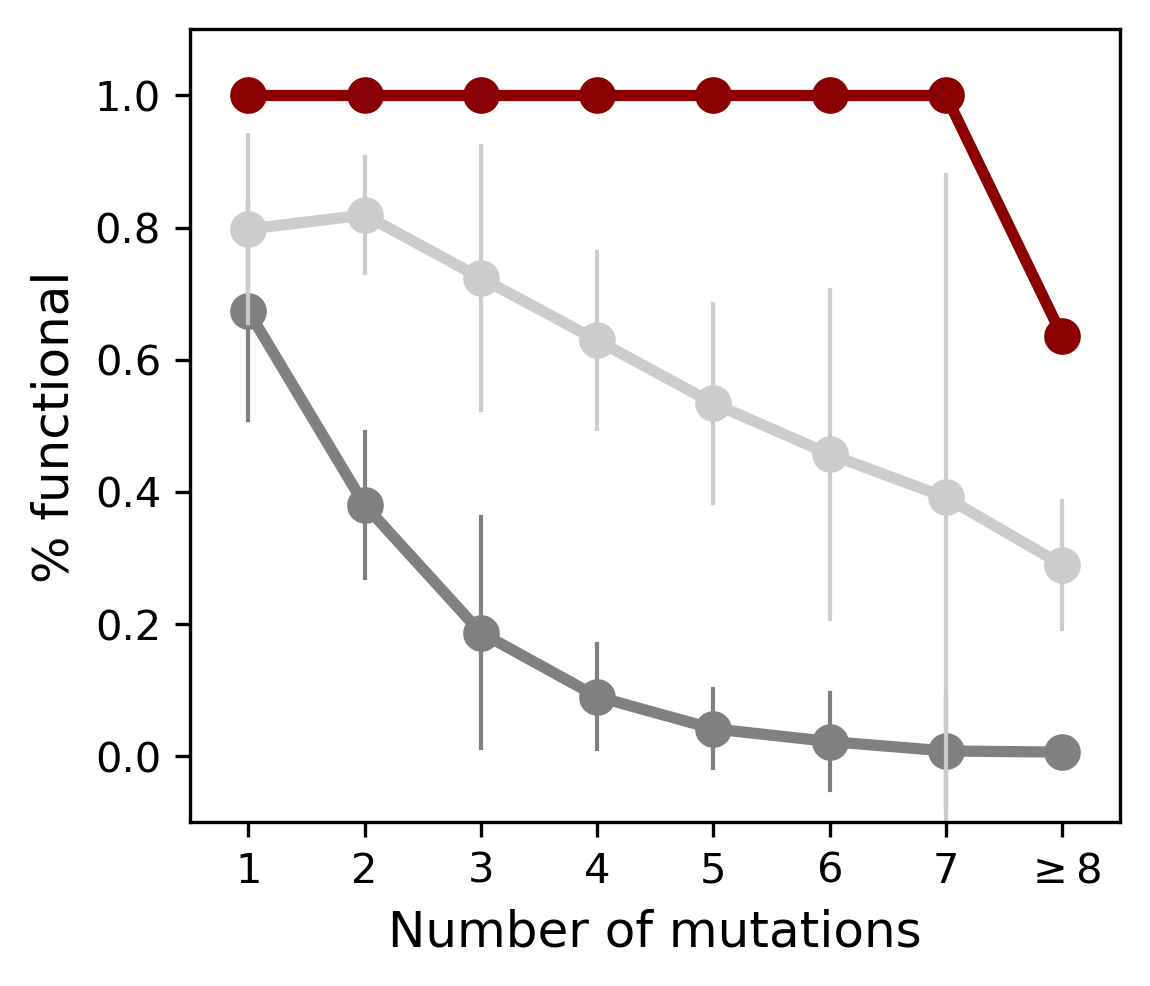

In [10]:
color_dict = {"Error-prone\nPCR" : '0.5', 
              "Pandemic\nmutations" : '0.8',
              "Computational\nDesigns":"darkred"}

fig, ax = plt.subplots(1, 1, figsize = (4,3.5))

sns.pointplot(data=df_fin[df_fin["label"].isin(color_dict)], 
              x="n_aa_substitutions", y="% func", ci = "sd",
              hue="label", edgecolor = 'k', errwidth = 1,
              palette = color_dict, ax=ax)


ax.set_xticklabels([str(i) if i <8 else r"$\geq$8" for i in range(1,9)])

#legend = ax.legend(loc = "lower left", ncol =1, fontsize = 6)
plt.legend([],[], frameon=False)

#sns.despine()
plt.xlabel("Number of mutations", fontsize=12)
plt.ylabel("% functional", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-0.1, 1.1)
plt.savefig('../Figures/Fig2a_prop_func.svg', format='svg')